<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_63_p_81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chapter 3. 신경망**

In [ ]:
# 퍼셉트론에 대한 나쁜 소식: 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은
# 여전히 사람이 수동으로 한다는 것.

# 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 이제부터 살펴볼 신경망의 중요한 성질.

In [ ]:
# 3.1 퍼셉트론에서 신경망으로
# 신경망은 퍼셉트론과 공통점이 많습니다
# 실제로 뉴런이 연결되는 방식은 퍼셉트론에서 달라진 것이 없다.

# 활성화 함수: activation function
# 입력 신호의 총합을 출력 신호로 변환하는 함수

# URL: https://www.lgcns.com/blog/cns-tech/ai-data/14558/

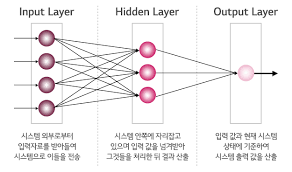

In [ ]:
# 활성화 함수
# 1) 계단 함수
# 2) 시그모이드 함수
# 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달합니다.

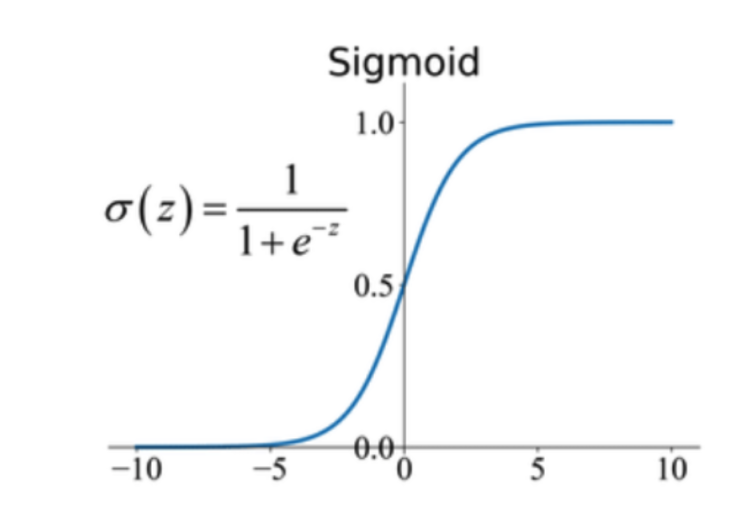

In [1]:
# 계단 함수 구현하기
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [6]:
def step_function(x):
  y=x>0
  return y.astype(np.int)

In [23]:
import numpy as np
x= np.array([-1.0, 1.0, 2.0])
print('x값:',x)
y=x>0
print('y값:',y)

x값: [-1.  1.  2.]
y값: [False  True  True]


In [25]:
y=y.astype(int)
print('y값:',y)

y값: [0 1 1]


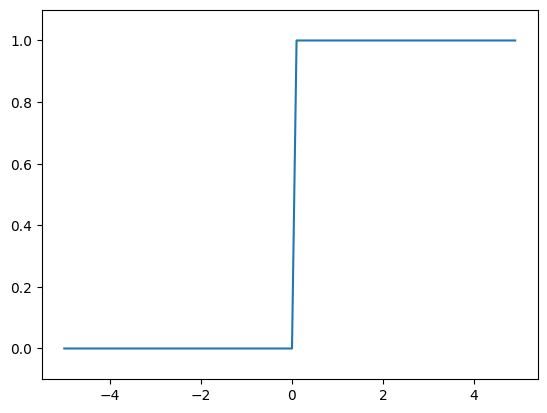

In [29]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=int)

x=np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열을 생성.
y=step_function(x) # 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단함수 실행해, 그 결과를 다시 배열로 만들어 돌려줍니다.

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정.
plt.show()

In [30]:
# 시그모이드 함수 구현하기
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

# 브로드캐스트 기능: 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행.

array([0.26894142, 0.73105858, 0.88079708])

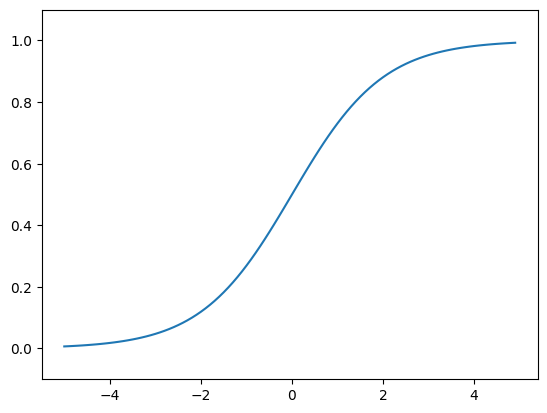

In [31]:
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

In [ ]:
# 시그모이드 함수와 계단 함수 비교
# 가장 먼저 느껴지는 점: 매끄러움의 차이.

# 시그모이드 함수: 부드러운 곡선이며, 입력에 따라 출력이 연속적으로 변화합니다.
# 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됩니다.

# 계단 함수: 0을 경계로 출력이 갑자기 바뀌어 버립니다.

In [ ]:
# 시그모이드 함수: 실수를 돌려준다.
# 계단 함수: 0과 1 중 하나의 값만 돌려준다. (시시오도시: 책에서 비유)

# 공통점: 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조.
# 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력.

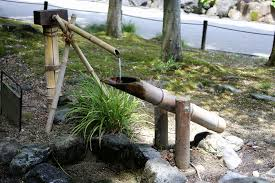

**비선형 함수**

In [ ]:
# 계단 함수와 시그모이드 함수의 공통점은 그 밖에도 있습니다. 중요한 공통점으로, 둘 모두는 비선형 함수입니다.

# 활성화 함수를 설명할 때, 비선형 함수와 선형 함수라는 용어가 자주 등장합니다.
# 함수란 어떤 값을 입력하면 그에 따라 값을 돌려주는 '변환기'입니다.
# 이 변환기에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다.

# 신경망에서는 활성화 함수로 비선형 함수를 사용해야 합니다.
# 왜 선형 함수는 안 되는 걸까요? 그 이유는 바로 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문입니다.
# 선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있습니다.

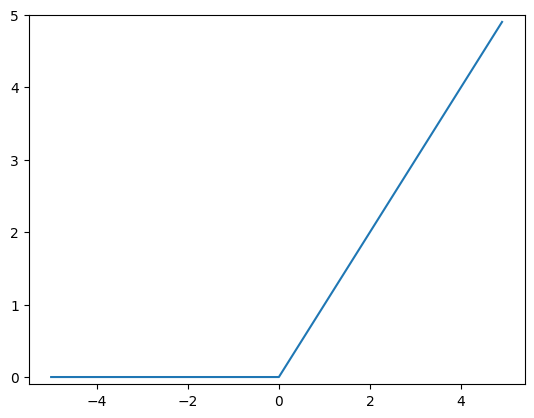

In [40]:
# ReLU함수
# 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력하는 함수.
x=np.arange(-5.0, 5.0, 0.1)
def relu(x):
  return np.maximum(0,x)

y=relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 5)
plt.show()

**다차원 배열의 계산**

In [41]:
# 넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있습니다.
# 다차원 배열도 그 기본은 '숫자의 집합'입니다.

import numpy as np
A=np.array([1, 2, 3, 4])
print('A값:',A)

print('np.ndim(A)값:', np.ndim(A))
print('A.shape값:', A.shape)

A값: [1 2 3 4]
np.ndim(A)값: 1
A.shape값: (4,)


**행렬의 곱**

In [42]:
A=np.array([[1,2],[3,4]])
print("A.shape값:",A.shape)

B=np.array([[5,6],[7,8]])
print("B.shape값:",B.shape)

np.dot(A,B)

A.shape값: (2, 2)
B.shape값: (2, 2)


array([[19, 22],
       [43, 50]])

In [44]:
# np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산합니다.

A=np.array([[1,2],[3,4,],[5,6]]) # 3x2 행렬
print("A.shape값:",A.shape)

B=np.array([7, 8]) # 2x1 벡터
print("B.shapr값:",B.shape)

np.dot(A,B) # 3 x 1 벡터

A.shape값: (3, 2)
B.shapr값: (2,)


array([23, 53, 83])